In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as snn
from sklearn import svm
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
label_encoder = LabelEncoder()

In [3]:
data = pd.read_csv(r'C:\Adrian\Universidad\8vo Semestre\4. Thu. - Inteligencia Artificial I\Exercises\Bedón, Ramos - Proyecto Final\Deepression.csv')
print(data.isnull().sum())
data

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64


,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cleaned_data = data.dropna()
print(cleaned_data.isnull().sum())

Number               0
Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64


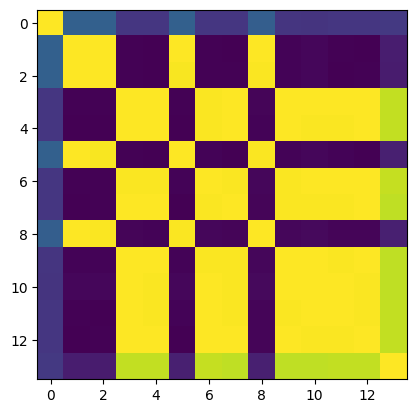

In [5]:
numeric_data = cleaned_data[['Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy']]
plt.imshow(numeric_data.corr())

In [6]:
def mapping(x):
    if "No depression" in x:
        return "No depression"
    if "Mild" in x:
        return "Mild"
    if "Severe" in x:
        return "Severe"
    if "Moderate" in x:
        return "Moderate"
    
cleaned_data['Depression State'] = cleaned_data['Depression State'].apply(mapping)

C:\Users\arbed\AppData\Local\Temp\ipykernel_9940\660209256.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Depression State'] = cleaned_data['Depression State'].apply(mapping)


In [7]:
categorical_data = ["Mild", "Moderate", "Severe", "No depression"]
numerical_data = label_encoder.fit_transform(categorical_data)
print(dict(zip(categorical_data, numerical_data)))

{'Mild': 0, 'Moderate': 1, 'Severe': 3, 'No depression': 2}


In [8]:
one_hot_encoded_data = pd.get_dummies(cleaned_data)

In [9]:
X = cleaned_data.drop('Depression State', axis=1)
X = X.drop('Number ', axis=1)
Y = cleaned_data['Depression State']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

               precision    recall  f1-score   support

         Mild      0.833     0.312     0.455        16
     Moderate      0.238     0.455     0.312        11
No depression      0.579     0.647     0.611        17
       Severe      0.250     0.200     0.222        10

     accuracy                          0.426        54
    macro avg      0.475     0.404     0.400        54
 weighted avg      0.524     0.426     0.432        54



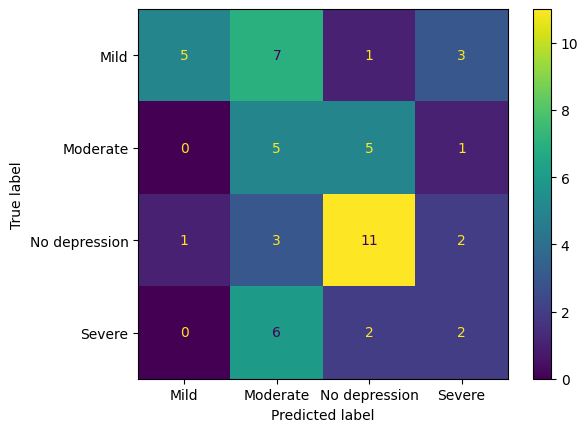

In [11]:
mdl_snn = snn.MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000000, random_state=42)
mdl_snn.fit(X_train, Y_train)
Y_pred = mdl_snn.predict(X_test)
prediction_nNetwork = np.array(Y_pred)
print(metrics.classification_report(Y_test, prediction_nNetwork, labels=mdl_snn.classes_, digits=3))
cm =metrics.confusion_matrix(Y_test, prediction_nNetwork, labels=mdl_snn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl_snn.classes_)
disp.plot()

               precision    recall  f1-score   support

         Mild      0.500     0.375     0.429        16
     Moderate      0.000     0.000     0.000        11
No depression      0.379     0.647     0.478        17
       Severe      0.308     0.400     0.348        10

     accuracy                          0.389        54
    macro avg      0.297     0.356     0.314        54
 weighted avg      0.325     0.389     0.342        54



c:\Users\arbed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arbed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arbed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

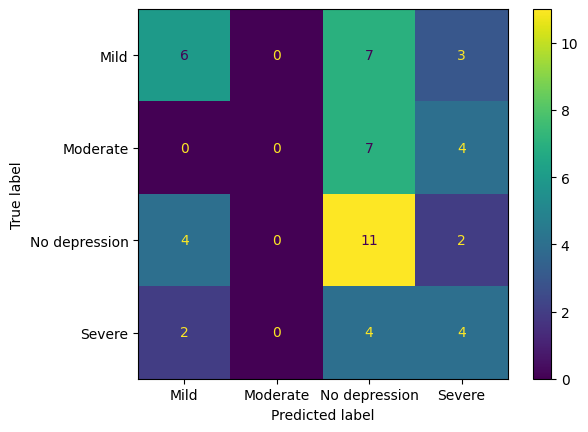

In [12]:
mdl_lrg = LogisticRegression(max_iter=10000000, random_state=42)
mdl_lrg.fit(X_train, Y_train)
Y_pred = mdl_lrg.predict(X_test)
prediction_lRegression = np.array(Y_pred)
print(metrics.classification_report(Y_test, prediction_lRegression, labels=mdl_lrg.classes_, digits=3))
cm =metrics.confusion_matrix(Y_test, prediction_lRegression, labels=mdl_lrg.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl_lrg.classes_)
disp.plot()

               precision    recall  f1-score   support

         Mild      0.588     0.625     0.606        16
     Moderate      0.500     0.091     0.154        11
No depression      0.312     0.294     0.303        17
       Severe      0.211     0.400     0.276        10

     accuracy                          0.370        54
    macro avg      0.403     0.353     0.335        54
 weighted avg      0.414     0.370     0.357        54



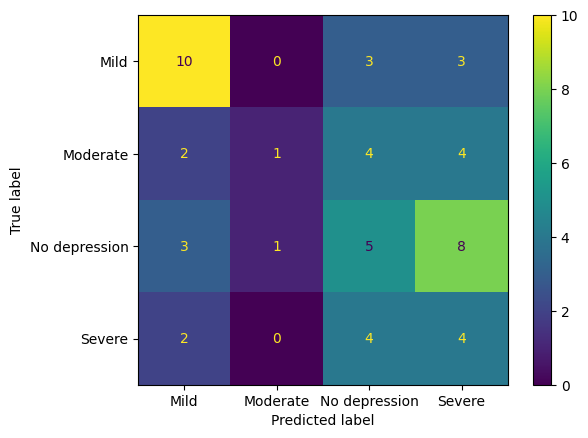

In [13]:
mdl_knn = neighbors.KNeighborsClassifier(n_neighbors=5)
mdl_knn.fit(X_train, Y_train)
Y_pred = mdl_knn.predict(X_test)
prediction_neighbors = np.array(Y_pred)
print(metrics.classification_report(Y_test, prediction_neighbors, labels=mdl_knn.classes_, digits=3))
cm =metrics.confusion_matrix(Y_test, prediction_neighbors, labels=mdl_knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl_knn.classes_)
disp.plot()

               precision    recall  f1-score   support

         Mild      0.344     0.688     0.458        16
     Moderate      0.000     0.000     0.000        11
No depression      0.400     0.353     0.375        17
       Severe      0.000     0.000     0.000        10

     accuracy                          0.315        54
    macro avg      0.186     0.260     0.208        54
 weighted avg      0.228     0.315     0.254        54



c:\Users\arbed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arbed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arbed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

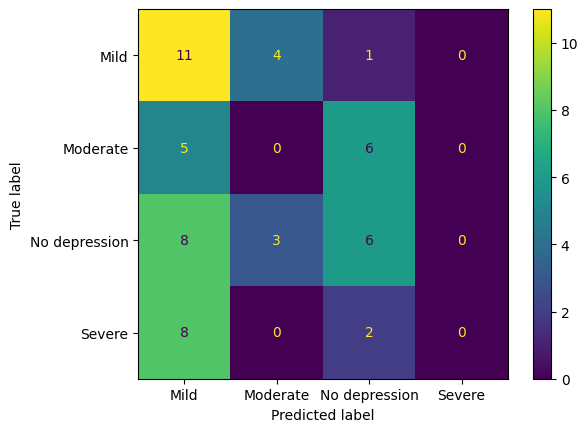

In [14]:
mdl_svm = svm.SVC(kernel='sigmoid')
mdl_svm.fit(X_train, Y_train)
Y_pred = mdl_svm.predict(X_test)
prediction_neighbors = np.array(Y_pred)
print(metrics.classification_report(Y_test, prediction_neighbors, labels=mdl_svm.classes_, digits=3))
cm =metrics.confusion_matrix(Y_test, prediction_neighbors, labels=mdl_svm.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl_svm.classes_)
disp.plot()

In [15]:
sleep = int(input())
appetite = int(input())
interest = int(input())
fatigue = int(input())
worthlessness = int(input())
concentration = int(input())
agitation = int(input())
suicidal_ideation = int(input())
sleep_disturbance = int(input())
agression = int(input())
panic_attacks = int(input())
hopelessness = int(input())
restlessness = int(input())
low_energy = int(input())

In [16]:
data_dict = {'Sleep': sleep, 
            'Appetite': appetite, 
            'Interest': interest, 
            'Fatigue': fatigue, 
            'Worthlessness': worthlessness, 
            'Concentration': concentration,
            'Agitation': agitation,
            'Suicidal Ideation': suicidal_ideation,
            'Sleep Disturbance': sleep_disturbance,
            'Aggression': agression,
            'Panic Attacks': panic_attacks,
            'Hopelessness': hopelessness,
            'Restlessness': restlessness,
            'Low Energy': low_energy}

data_production = pd.DataFrame(data_dict, index=[0])
data_production

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
0,3,2,5,1,5,1,1,4,1,1,1,1,3,2


In [17]:
Y_pred_lrg = mdl_lrg.predict(data_production)
Y_pred_snn = mdl_snn.predict(data_production)
Y_pred_knn = mdl_knn.predict(data_production)
Y_pred_svm = mdl_svm.predict(data_production)
prediction_lRegression = np.array(Y_pred_lrg)
prediction_nNetwork = np.array(Y_pred_snn)
prediction_nNeighbors = np.array(Y_pred_knn)
prediction_svMachine = np.array(Y_pred_svm)
print(prediction_lRegression)
print(prediction_nNetwork)
print(prediction_nNeighbors)
print(prediction_svMachine)

['Mild']
['Mild']
['No depression']
['Mild']
